In [1]:
from pandas import Series, DataFrame
import pandas as pd 
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)


.1. Create a unique name for each restaurant. On the DataFrame created above, add a new column to your DataFrame, called 'RESTAURANT', that combines DBA, BUILDING, STREET, and ZIPCODE fields. For example, "WENDY’S 469 FLATBUSH AVENUE 11225".
Print the first 10 values of the RESTAURANT column of your DataFrame.  

I created a new key for df and made it equal to the sums (since they're all string it just concatenates) of the df[KEY] of the things I wanted the new column to equal.  

In [2]:
df['RESTAURANT'] = df['DBA']+ " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']

In [3]:
df[0:10]['RESTAURANT']


0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

.2. How many restaurants are included in the data?
Careful now:
• A "Subway" in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant 

I searched and found a method that does what I need. SERIES.nunique() takes a series and returns the total number of unique iterations. 

In [4]:
df['RESTAURANT'].nunique()

10114

.3. How many chains are there? Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode) addresses.  
I created a dataframe of just DBA and RESTAURANTS because those are the things I wanted to filter on. By dropping duplicates I remove all of the exact same restaurants from the list.  

Then I created another dataframe that's been filtered so I only have restaurants with at least two occurances. Then I again found the nunique. 

In [5]:
df2 = df[['DBA', 'RESTAURANT']].drop_duplicates()

df3 = df2.groupby('DBA').filter(lambda x: len(x)>1)

df3['DBA'].nunique()


368

.4. Plot a bar graph of the top 20 most popular chains. We already have the chains from the previous problem. 

Took the series of just the DBA names and counted. It automatically sorts so from 0:20 I got the most common. Had to do %pylab inline to make it not open a new window. Don't know why. 

Populating the interactive namespace from numpy and matplotlib


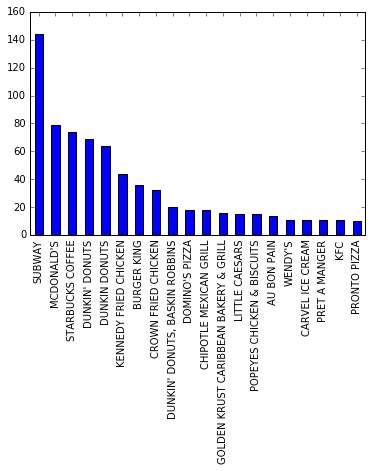

In [6]:
popDf = Series(df3['DBA']).value_counts()[0:20]  
%pylab inline
popDf.plot(kind = "bar") 

.5.  What fraction of all restaurants are chains?  

df3 is a dataframe that contains all the chain restaurants therefore its number of rows is the number of restaurants that are parts of chains. I divided this by the number of unique restaurants (restaurants are different addresses). About 16.47% of the restaurants are chains. 


In [7]:
float(len(df3))/df['RESTAURANT'].nunique() 

0.16472216729286138

.6. Plot the number of non-chain restaurants in each boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the "missing" boro.  

I used essentially the same filter only making the lambda function only count if it's less than 2 (i.e. Not a chain). Then made the dataframe equal to the dataframe where the dataframe[BORO] does not equal missing. Then I did a value count and plotted it. 

Populating the interactive namespace from numpy and matplotlib


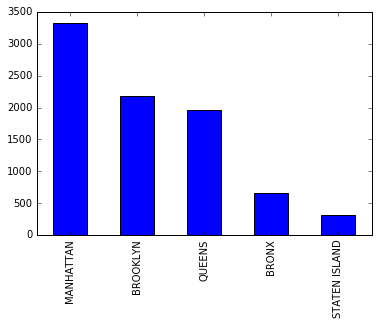

In [8]:
dfMistake = df[['DBA', 'BORO', 'RESTAURANT']].drop_duplicates()
df4 = dfMistake.groupby('DBA').filter(lambda x: len(x)<2) 

df4 = df4[df4['BORO'] != 'Missing'] 

%pylab inline
df5 = df4['BORO'].value_counts()

df5.plot(kind = 'bar')

.7. Plot the fraction of non-chain restaurants in each boro. The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most \independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?  


Manhattan was the boro with the most non-chain restaurants, but Brooklyn has the bighest percentage of non-chain to total restaurants. 

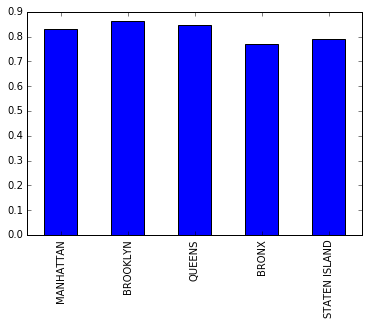

In [9]:
df6 = df[['DBA', 'BORO', 'RESTAURANT']].drop_duplicates() #This is the total restaurants 
df6 = df6[df6['BORO'] != 'Missing']
df7 = df5/df6['BORO'].value_counts()

df7.plot(kind = "bar") 

.8. Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Plot the popularity of the top 20 cuisines. Again, be careful in your counting: remember that the same restaurant can have multiple violations! 

I created a dataframe with the keys of interest and plotted it based on value count.

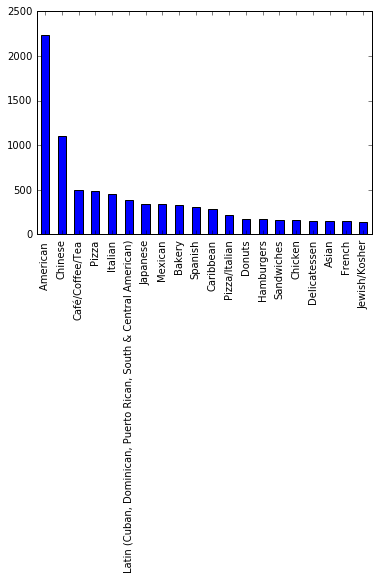

In [10]:
df8 = df[['DBA', 'BORO', 'CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()
df9 = df8['CUISINE DESCRIPTION'].value_counts()[0:20] 

df9.plot(kind = "bar")

.9. Plot the cuisines among restaurants which never got cited for violations. Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the 'VIOLATION CODE' field is missing.

• Select only the ’RESTAURANT’ and ’CUISINE DESCRIPTION’ columns of the DataFrame (we created the ’RESTAURANT’ field in an earlier question).

• Select the instances where a restaurant did not get cited.

• Among these instances, how frequent is each of the cuisines? 


I created a dataframe with the three keys I thought were relevent (dropping duplicates which made it so if a restaurant never had a violation, it was reduced to one row while any restaurant that had an NaN and a violation had multiple rows). Then I filtered away all restaurants that appeared twice. This meant a bunch of rows that were either NaN or a violation (any NaNs that occured when they didn't have an entirely clean record were expunged by the filter). I created a mask with the isnull function to get only the restaurants who had no violations. Then I plotted the counts of the top cuisines who had no violations. American cuisine won with 49, but they were also the most common cuisine overall, so we would have to look at a rate to know which is the cleanest cuisine.   

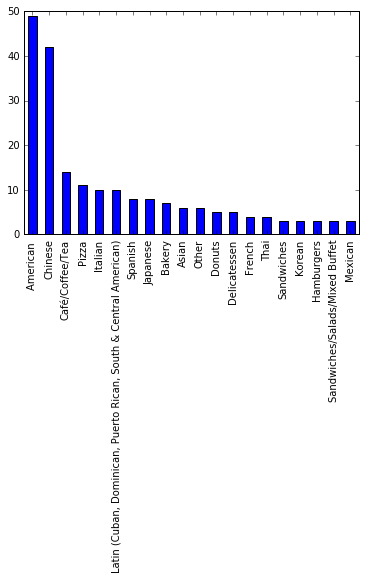

In [18]:
dfA = df[["RESTAURANT", "CUISINE DESCRIPTION","VIOLATION DESCRIPTION"]] 
dfB = dfA.drop_duplicates() 
dfC = dfB.groupby("RESTAURANT").filter(lambda x: len(x) < 2) 
mask = dfC["VIOLATION DESCRIPTION"].isnull()
dfD = dfC[mask] 
dfE = dfD["CUISINE DESCRIPTION"].value_counts()
dfE[0:20].plot(kind = "bar") 

.10. What cuisines tend to be the "cleanest"?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.
• For each such cuisine, compute the ratio of inspections where the violation code is missing (so the inspection passed) versus the total number of rows for that cuisine. (This is just the ratio of counts in the previous two questions.)
• Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean." (Hint: Check out the "sort values" method for Series). 

I created dataframes for the total counts of cuisines and cuisines of restaurants without a violation. Then I used a mask to only get cuisines with at least 20 restaurants representing them. I applied that mask to both dataframes and divided them. Then I sorted them descending values and plotted the top 10. 

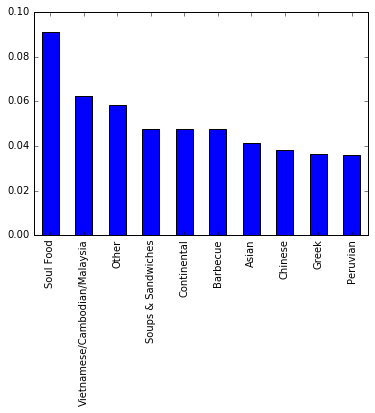

In [12]:
df12 = dfD['CUISINE DESCRIPTION'].value_counts() 
df13 = df8['CUISINE DESCRIPTION'].value_counts()
mask = (df13 >= 20)  
df14 = df12[mask] 
df15 = df13[mask]
df16 = df14/df15
df17 = df16.sort_values(ascending = False)
df17[0:10].plot(kind = "bar")

.11. What are the most common violations in each borough? 

Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough. To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class.

Once you do have the table, you will still need to find the most common violation description for each borough. 

I created the full table with crosstabs and for each column I found the max value and the row that corresponded. It was the same for all Boros and a cursory glance at the table seems to confirm this. 

In [13]:
violationBoroTable = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO']) 
violationBoroTable = violationBoroTable.drop("Missing", 1)
for column in violationBoroTable:
    print column +": "+ violationBoroTable[column].argmax() 

BRONX: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
BROOKLYN: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
MANHATTAN: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
QUEENS: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not 

.12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?
Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts.  as follows.
• Get overall frequencies: Figure out how common each violation is, over the entire dataset; let’s call this violationFrequency.
• Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough.
• Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description. 

I just divided each column (Boro) by the violationFrequency. Then I used the same loop as the previous question to print out the max row.  

In [14]:
violationFrequency = df["VIOLATION DESCRIPTION"].value_counts() 

for columns in violationBoroTable: 
    violationBoroTable[columns] = violationBoroTable[columns]/violationFrequency 
    
for column in violationBoroTable: 
    print column +": "+ violationBoroTable[column].argmax() 



BRONX: Unprotected food re-served.
BROOKLYN: Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.
MANHATTAN: Out-of package sale of tobacco products observed.
QUEENS: Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.
STATEN ISLAND: Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.


.13. How many phone area codes correspond to a single zipcode? 
The first three digits of the restaurant phone numbers are their
area codes. The area codes do not generally align with zip codes, but some area codes are only for a single zip code. You must figure out how many area codes have this property.
• To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists  

I created a dataframe of zipcodes and areacodes. Then I dropped all duplicates. This should return a dataframe of unique areacode and zipcode combinations. Then I grouped it by areacode and filtered away all who had more than 1. Then I counted up the total number of what was left. There are 34 areacodes that correspond to one zipcode. I did get a warning, but I cannot figure how to use loc to get rid of the warning. 

In [15]:
df18 = df[['PHONE']] 
df19 = df[['ZIPCODE']]
df19["AREACODE"] = df18.PHONE.str[0:3] 
df20 = df19.drop_duplicates()  

df21 = df20.groupby("AREACODE").filter(lambda x: len(x)<2) 

sum(df21["ZIPCODE"].value_counts()) 


C:\Users\vince\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


34L

.14. Find common misspellings of street names Sometimes, it’s Avenue, and sometimes, it’s Ave. We will try to come up with an
automated way to find common misspellings. 

The idea is the following: if Ave and Avenue are the same, they should show up often in similar-sounding street names, e.g., Lexington Ave and Lexington Avenue.

• Create a new column, called STREET TYPE, which is the the last word in the name of the street. For example, if the street is "Astoria Boulevard", the street type should be "Boulevard".

• Create another column, called STREET BASE, which contains everything but the last word in the name of the street. For example, if the street is "Astoria Boulevard", the street base should be "Astoria".

• Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode.

• Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now contains unique street names, along with the street type.

• Merge this table with itself, on the STREET BASE & ZIP column. Thus, in the new merged tabled, we will have two STREET TYPE fields for each street base and zipcode. For example, if both Lexington Ave and Lexington Avenue exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue.

• From the merged table, select only the rows where the street types are different.

• Now, do a cross-tabulation of the two distinct street types (check out the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET BASE & ZIP.

• From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD.  

I split the street column then grabbed the last word and everything else to get the street base and street type. I replaced empty strings with NaN then removed those and duplicates. I merged the tables and made a crosstab. I could not find any entires for "BOULEARD" so I used BOULEVARD instead. The most common street type for the given list was the following respectively: AVENUE, STREET, ROAD, PLACE, BLVD, BLVD

In [16]:
import numpy as np
df22 = pd.DataFrame()

df22["STREET BASE"] = df["STREET"].str.split(" ").str[:-1] 

df22["STREET TYPE"] = df["STREET"].str.split(" ").str.get(1) 

df22["STREET BASE"] = df22['STREET BASE'].str.join(sep = " ").str.rstrip()

df22["STREET BASE & ZIP"] = df22["STREET BASE"] + " " + df["ZIPCODE"] 
#print df22.loc[df22['STREET TYPE'] == "BOULEARD"]
df22 = df22.replace("", np.nan)
df22 = df22.drop_duplicates().dropna()


df23 = pd.merge(df22, df22, on = "STREET BASE & ZIP")

mask = df23["STREET TYPE_x"] != df23["STREET TYPE_y"] 

df23 = df23[mask] 

finaldf = pd.crosstab(df23["STREET TYPE_x"],df23["STREET TYPE_y"]) 

print finaldf["AVE"].argmax()
print finaldf["ST"].argmax()
print finaldf["RD"].argmax()
print finaldf["PL"].argmax()
print finaldf["BOULEVARD"].argmax()
print finaldf["BULEVARD"].argmax()

AVENUE
STREET
ROAD
PLACE
BLVD
BLVD
